In [2]:
import pandas as pd

#Loading the data from given excel sheet link
url = 'https://docs.google.com/spreadsheets/d/1KagwoQLy1quKvT_82amuS-x3UnsoIX4J6p02ewbjQNA/export?format=xlsx'

#using pandas library and openpyxl we will read the data from excel sheet
data = pd.read_excel(url, engine='openpyxl')

# check whether it is working or not by running few columns and rows
print(data.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology  Accessories

In [4]:
#yeah, its working now as you asked let's check a few data exploration methods

#1.Using the data.info() method lets know about the info about dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [5]:
#done, thats good
#2.using data.describe() let's check some statistical data
print(data.describe())

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-07 00:00:00  99301.00

In [6]:
#well and good, lets move to next exploration method
#using data.isnull().sum() we are going to check for missing values
print(data.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [7]:
#looks like there are 41296 blank rows in Postal code column, Lets do some data cleaning using the data.fillna()
data.fillna(0, inplace=True)

In [8]:
#lets check after cleaning it is having missing values or not
print(data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [9]:
#yep, no missing values now 
#so no missing now, no need of further cleaning of the data
#lets check the total number of objects for each category
print(data['Category'].value_counts())


Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64


In [15]:
print(data.columns)
#just printed for reference to do visualization part

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')


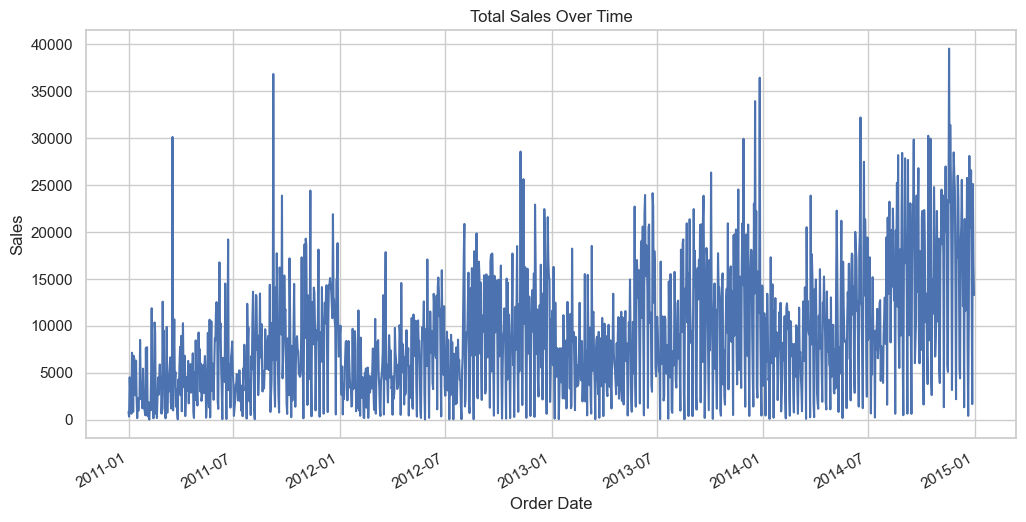

In [16]:
#lets start visualization part
#lets show the Total sales over time using a chart
import matplotlib.pyplot as plt   #matplotlib library for visualizing chart
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()


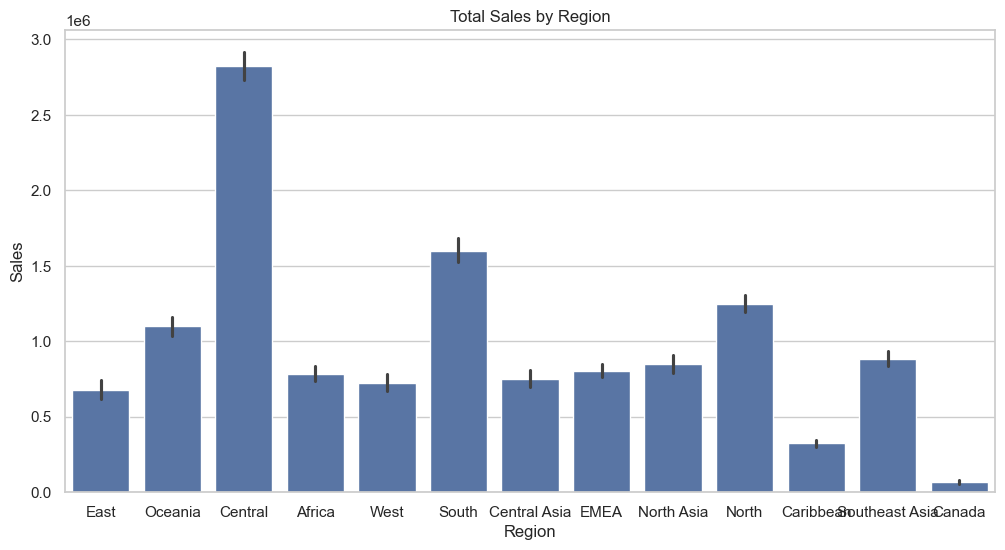

In [17]:
#lets show the sales by region
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=data, estimator=sum) #creating the bar chart by using barplot for visualization
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()
#we can see insights over there 

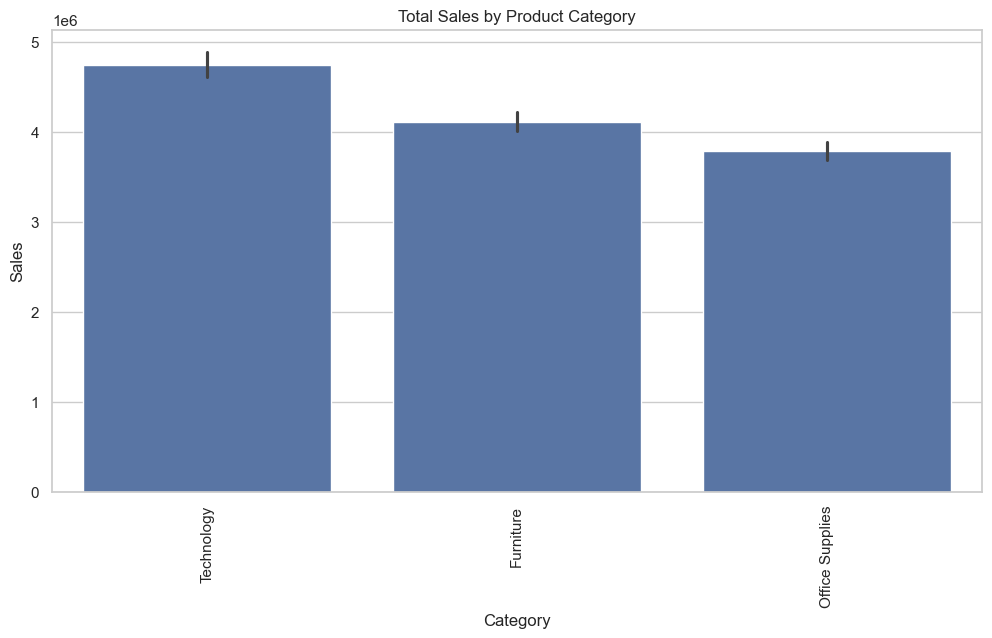

In [18]:
#sales by product category
import seaborn as sns # using the seaborn library we are plotting bar graph for visualization

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


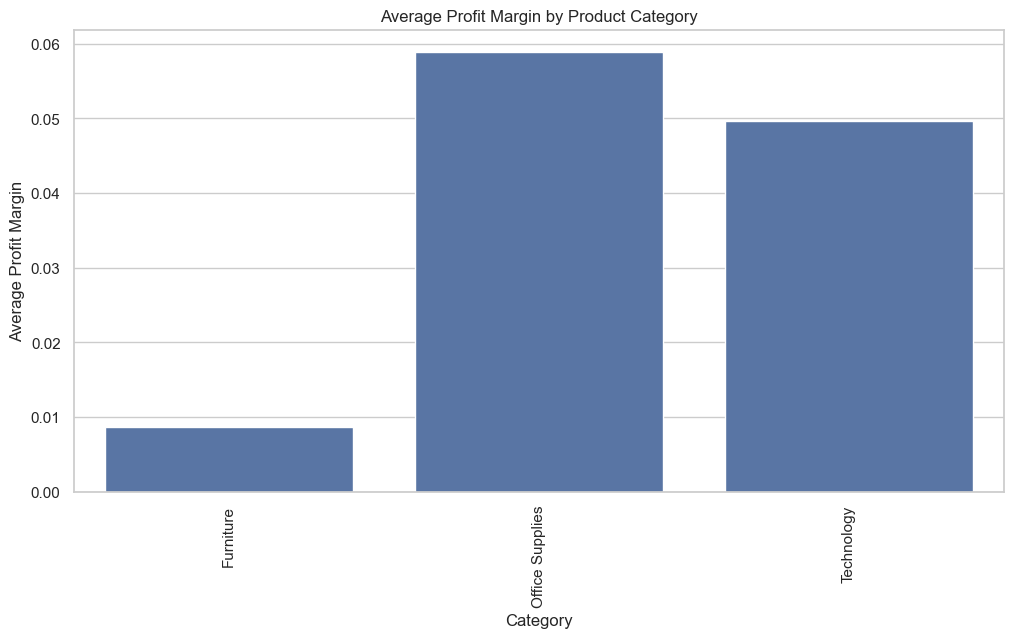

In [19]:
# to find the profit margin we are going to add a new column named profit margin(Data Manipulation)
data['Profit Margin'] = data['Profit'] / data['Sales'] 

# formula for calculating average profit margin by category
avg_profit_margin = data.groupby('Category')['Profit Margin'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit Margin', data=avg_profit_margin)
plt.title('Average Profit Margin by Product Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Profit Margin')
plt.show()


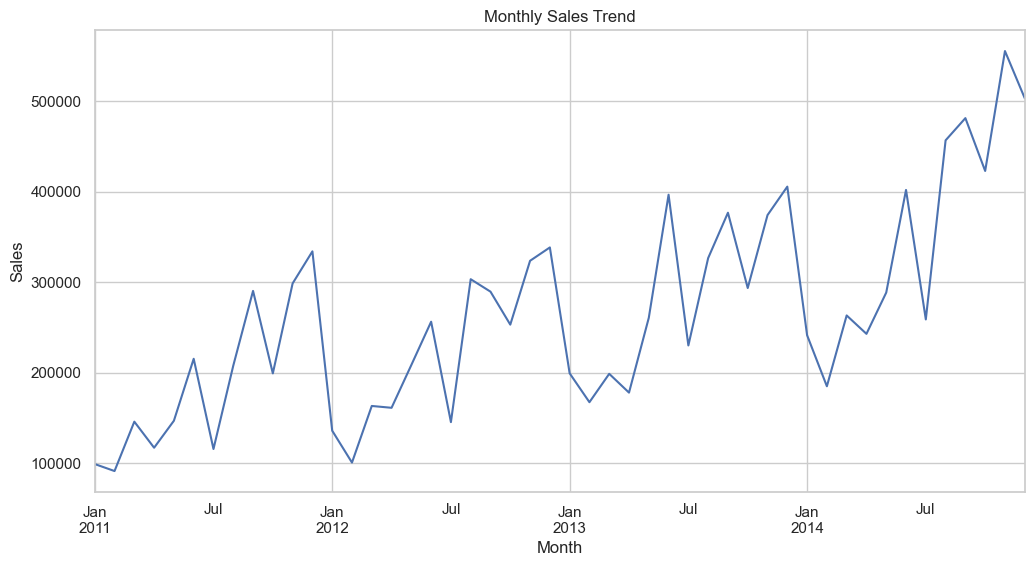

In [20]:
# now using line chart for visualization we are going to show trend analysis
monthly_sales = data.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


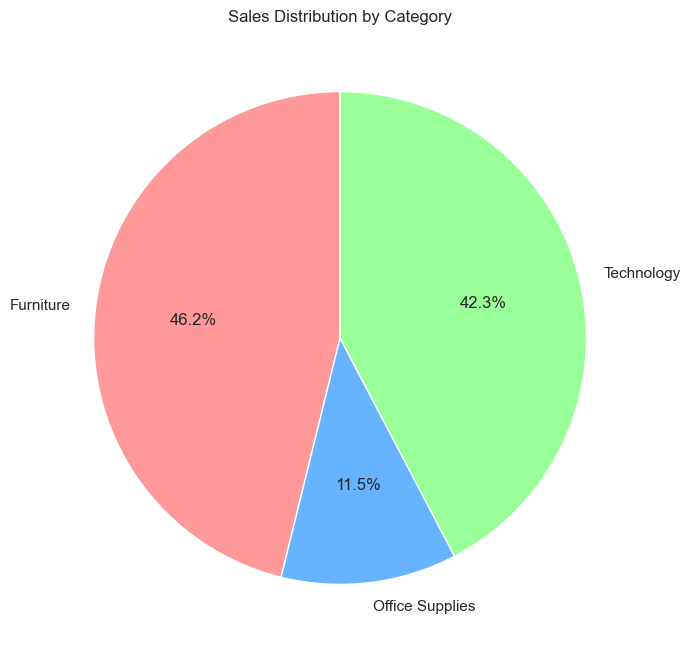

In [21]:
#drawing the pie chart for sales distribution by category
import matplotlib.pyplot as plt

data = {
    'Category': ['Furniture', 'Technology', 'Office Supplies', 'Furniture', 'Technology'],
    'Sales': [200, 300, 150, 400, 250]
}
df = pd.DataFrame(data)

category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(8, 8))
category_sales.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.ylabel('')
plt.title('Sales Distribution by Category')
plt.show()


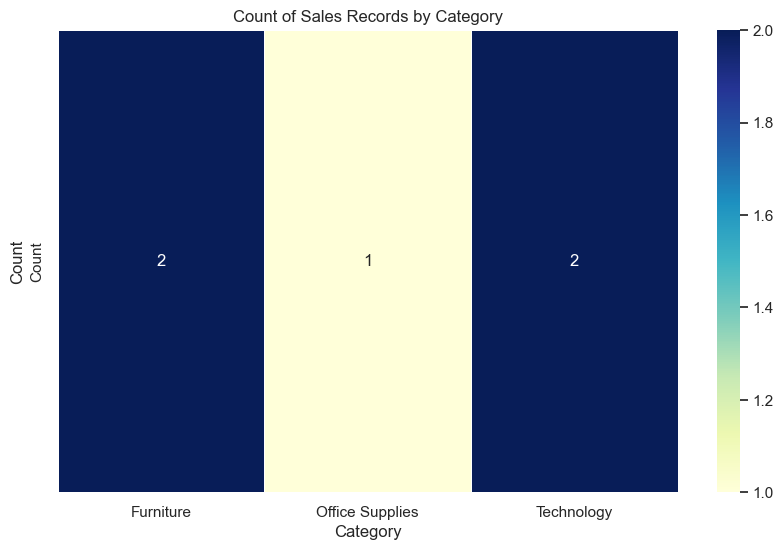

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


count_df = df.groupby('Category').size().reset_index(name='Count')

# using the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_df.set_index('Category').T, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Count of Sales Records by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [40]:
"""in this project what i have done is
1.Loaded the data from excel sheets using pandas and openpyxl
2.Done some data exploration methods like data.info(),data.describe(),data.isnull.sum(),data.fillna()
3.Done some data cleaning when we found null cells for the postal code column
4.Manipulated the data by adding new column named profit margin
5.Finally done data visualization using Line chart,bar chart,scatter chart,pie chart and heat map
Now i am going to create a Report in Power BI using all the given measures"""


'in this project what i have done is\n1.Loaded the data from excel sheets using pandas and openpyxl\n2.Done some data exploration methods like data.info(),data.describe(),data.isnull.sum(),data.fillna()\n3.Done some data cleaning when we found null cells for the postal code column\n4.Manipulated the data by adding new column named profit margin\n5.Finally done data visualization using Line chart,bar chart,scatter chart,pie chart and heat map\nNow i am going to create a Report in Power BI using all the given measures'